# Load libraries and data sets

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:
# Load data set "energy consumption in household sector"
path = r'/Users/gomula/Documents/Finalproject'
consump_household = pd.read_csv(os.path.join(path, '2 Data set', 'Original', 'ten00125_linear.csv','ten00125_linear.csv'), index_col=False)
consump_household.head()

,DATAFLOW,LAST UPDATE,freq,nrg_bal,siec,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TEN00125(1.0),14/04/22 11:00:00,A,FC_OTH_HH_E,C0000X0350-0370,KTOE,AL,2009,0.000,NaN
1,ESTAT:TEN00125(1.0),14/04/22 11:00:00,A,FC_OTH_HH_E,C0000X0350-0370,KTOE,AL,2010,0.000,NaN
2,ESTAT:TEN00125(1.0),14/04/22 11:00:00,A,FC_OTH_HH_E,C0000X0350-0370,KTOE,AL,2011,0.000,NaN
3,ESTAT:TEN00125(1.0),14/04/22 11:00:00,A,FC_OTH_HH_E,C0000X0350-0370,KTOE,AL,2012,0.235,NaN
4,ESTAT:TEN00125(1.0),14/04/22 11:00:00,A,FC_OTH_HH_E,C0000X0350-0370,KTOE,AL,2013,0.235,NaN


In [7]:
# remove redundant columns
consump_household.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'OBS_FLAG', 'unit'], axis=1, inplace=True)

In [8]:
# define the name of columns
consump_household.rename(columns={'geo': 'country-code', 'TIME_PERIOD': 'time-period', 'OBS_VALUE': 'value(KTOE)', 'nrg_bal': 'sector'}, inplace=True)

In [9]:
# define the codes of countries and fuels
country_codes = {'SK':'Slovakia', 'FI':'Finland', 'SE':'Sweden', 'IS':'Iceland','NO':'Norway', 'UK':'United Kingdom',
                 'ME': 'Montenegro','MK':'North Macedonia', 'GE':'Georgia', 'EU27_2020':'European Union - 27 countries (from 2020)', 
                 'AL':'Albania', 'RS':'Serbia', 'TR':'Turkey', 'BA':'Bosnia and Herzegovina', 'MD':'Moldova', 'UA':'Ukraine',  
                 'EA19':'Euro area - 19 countries (from 2015)', 'BE':'Belgium', 'BG':'Bulgaria', 'CZ':'Czechia', 'DK':'Denmark',
                 'DE':'Germany', 'EE':'Estonia', 'IE':'Ireland', 'EL':'Greece', 'ES': 'Spain', 'FR':'France', 'HR':'Croatia',
                 'IT':'Italy', 'CY':'Cyprus', 'LV':'Latvia', 'LT':'Lithuania', 'LU':'Luxembourg', 'HU':'Hungary', 'MT':'Malta',
                 'NL':'Netherlands', 'AT':'Austria', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 'SI':'Slovenia',
                 'EU28':'European Union - 28 countries (2013-2020)', 'LI':'Liechtenstein', 'CH':'Switzerland',
                 'XK':'Kosovo'}
len(country_codes)

45

In [10]:
# define the codes of fuels
energy_codes = {'TOTAL':'Total', 'C0000X0350-0370':'Solid fossil fuels', 'G3000':'Natural gas', 'O4630':'Liquefied petroleum gases',
              'O4669':'Other kerosene', 'O4671XR5220B':'Gas oil and diesel oil (excluding biofuel portion)', 'RA410':'Solar thermal',
              'RA600':'Ambient heat (heat pumps)', 'R5110-5150_W6000RI':'Primary solid biofuels', 'E7000':'Electricity', 'H8000':'Heat',
              }
len(energy_codes)

11

In [11]:
# define code of sectores
sect_codes = {'FC_OTH_HH_E':'households'}

In [12]:
# replace country abbreviations by full name
consump_household['country'] = list(map(country_codes.get, consump_household['country-code'].tolist()))

In [13]:
# replace energy codes by complete name
consump_household['energy-type'] = list(map(energy_codes.get, consump_household['siec'].tolist()))

In [14]:
# replace sector abbreviations by full name
consump_household['sector'] = list(map(sect_codes.get, consump_household['sector'].tolist()))

In [15]:
# remove columns: siec & country
consump_household.drop(['siec', 'country-code'], axis=1, inplace=True)

In [16]:
# put columns in order
consump_household = consump_household[['country', 'time-period', 'sector','energy-type', 'value(KTOE)']]
consump_household.head()

,country,time-period,sector,energy-type,value(KTOE)
0,Albania,2009,households,Solid fossil fuels,0.000
1,Albania,2010,households,Solid fossil fuels,0.000
2,Albania,2011,households,Solid fossil fuels,0.000
3,Albania,2012,households,Solid fossil fuels,0.235
4,Albania,2013,households,Solid fossil fuels,0.235


In [17]:
# shape of the dataset
consump_household.shape

(5423, 5)

In [18]:
# data type of attributes
consump_household.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5423 entries, 0 to 5422
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      5423 non-null   object 
 1   time-period  5423 non-null   int64  
 2   sector       5423 non-null   object 
 3   energy-type  5423 non-null   object 
 4   value(KTOE)  5423 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 212.0+ KB


There is no null values in dataset

In [23]:
# check for mixed data type in df_ords
for col in consump_household.columns.tolist():
  weird = (consump_household[[col]].applymap(type) != consump_household[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (consump_household[weird]) > 0:
    print (col + ' contains mixed data types')
  else:
    print (col + ' doesn\'t contain mixed data types')

country doesn't contain mixed data types
time-period doesn't contain mixed data types
sector doesn't contain mixed data types
energy-type doesn't contain mixed data types
value(KTOE) doesn't contain mixed data types


In [28]:
# descriptive statisctics
consump_household.describe()

,time-period,value(KTOE)
count,5423.000000,5423.000000
mean,2014.567951,3495.617775
std,3.431167,17124.753965
min,2009.000000,0.000000
25%,2012.000000,1.552000
50%,2015.000000,109.547000
75%,2018.000000,1112.849000
max,2020.000000,278887.004000


the data distribution for time period is ok as it is the annual data, but in value there are lots of outliers which seems to be rational as they are the summation values

<Axes: ylabel='Frequency'>

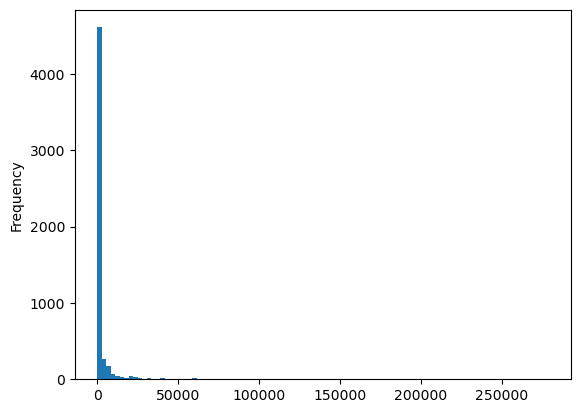

In [29]:
# distribution of value(KTOE)
consump_household['value(KTOE)'].plot.hist(bins=100)

### Like the other data sets here we have lots of '0' values which seems to be normal as there are lots of unmeasured data or lots of real zero measurements

In [30]:
# value distribution for 'country'
consump_household['country'].value_counts()

Albania                                      132
Iceland                                      132
Lithuania                                    132
Luxembourg                                   132
Latvia                                       132
Montenegro                                   132
North Macedonia                              132
Malta                                        132
Netherlands                                  132
Norway                                       132
Poland                                       132
Portugal                                     132
Romania                                      132
Serbia                                       132
Sweden                                       132
Slovenia                                     132
Slovakia                                     132
Turkey                                       132
Ukraine                                      132
Austria                                      132
Italy               

In [31]:
# data distribution for 'energy-type'
consump_household['energy-type'].value_counts()

Solid fossil fuels                                    493
Electricity                                           493
Natural gas                                           493
Heat                                                  493
Liquefied petroleum gases                             493
Other kerosene                                        493
Gas oil and diesel oil (excluding biofuel portion)    493
Primary solid biofuels                                493
Solar thermal                                         493
Ambient heat (heat pumps)                             493
Total                                                 493
Name: energy-type, dtype: int64

In [32]:
# data distribution for sector
consump_household['sector'].value_counts()

households    5423
Name: sector, dtype: int64

In [33]:
# remove rows related to 'EU27_2020' & 'EA19' & 'EA28' as they are summations for contries in EU and they are not helpful in our analysis
consump_household.drop(consump_household[consump_household['country'].isin(['European Union - 27 countries (from 2020)',
            'Euro area - 19 countries (from 2015)', 'European Union - 28 countries (2013-2020)'])].index, inplace=True)
set(consump_household['country'])

{'Albania',
 'Austria',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Kosovo',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Moldova',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Turkey',
 'Ukraine',
 'United Kingdom'}

In [34]:
# check for null values again
consump_household.isnull().sum()

country        0
time-period    0
sector         0
energy-type    0
value(KTOE)    0
dtype: int64

In [35]:
# check for duplicity
consump_household[consump_household.duplicated()]

,country,time-period,sector,energy-type,value(KTOE)


There is no duplicated row

In [42]:
# reset index for new dataset
consump_household.reset_index(drop=True, inplace=True)
consump_household

,country,time-period,sector,energy-type,value(KTOE)
0,Albania,2009,households,Solid fossil fuels,0.000
1,Albania,2010,households,Solid fossil fuels,0.000
2,Albania,2011,households,Solid fossil fuels,0.000
3,Albania,2012,households,Solid fossil fuels,0.235
4,Albania,2013,households,Solid fossil fuels,0.235
...,...,...,...,...,...
5154,Kosovo,2016,households,Total,549.413
5155,Kosovo,2017,households,Total,571.465
5156,Kosovo,2018,households,Total,573.404
5157,Kosovo,2019,households,Total,586.881


# The final form of the 'consum_household' data frame will be as follow

In [43]:
consump_household.head()

,country,time-period,sector,energy-type,value(KTOE)
0,Albania,2009,households,Solid fossil fuels,0.000
1,Albania,2010,households,Solid fossil fuels,0.000
2,Albania,2011,households,Solid fossil fuels,0.000
3,Albania,2012,households,Solid fossil fuels,0.235
4,Albania,2013,households,Solid fossil fuels,0.235


In [44]:
consump_household.shape

(5159, 5)

In [45]:
consump_household.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5159 entries, 0 to 5158
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      5159 non-null   object 
 1   time-period  5159 non-null   int64  
 2   sector       5159 non-null   object 
 3   energy-type  5159 non-null   object 
 4   value(KTOE)  5159 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 201.6+ KB


In [46]:
consump_household.describe()

,time-period,value(KTOE)
count,5159.000000,5159.000000
mean,2014.571429,1585.884467
std,3.430059,5139.643317
min,2009.000000,0.000000
25%,2012.000000,1.027000
50%,2015.000000,81.693000
75%,2018.000000,869.089000
max,2020.000000,63839.122000


<Axes: ylabel='Frequency'>

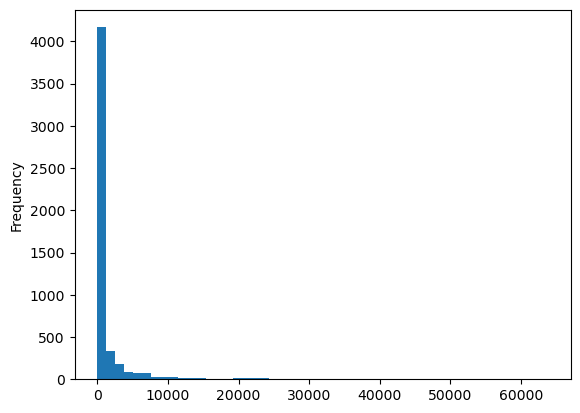

In [47]:
consump_household['value(KTOE)'].plot.hist(bins=50)

In [48]:
# Save data set in pickle and csv formats
consump_household.to_csv(os.path.join(path, '2 Data set', 'Modified', 'consump_household.csv'))
consump_household.to_pickle(os.path.join(path, '2 Data set', 'Modified', 'consump_household.pkl'))